# A Jupyter Notebook to visualize OpenPATH data for the purposes of calculating a MEP score.

In [1]:
year = None
month = None
program = "prepilot"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from collections import defaultdict
!pip install geopy # <- uncomment me if first time running!
# plt.style.use('dark_background')

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

In [3]:
# a heap of functions that Shankari made for this
import scaffolding 
from plots import *

Connecting to database URL db


In [4]:
# Loading mapping dictionaries from mapping_dictionaries notebook
%store -r dic_ei
%store -r dic_pur
%store -r dic_re

# convert a dictionary to a defaultdict
dic_pur = defaultdict(lambda: 'Other',dic_pur)
dic_re = defaultdict(lambda: 'Other',dic_re)

no stored variable or alias dic_ei


In [5]:
tq = scaffolding.get_time_query(year, month) # time query which we use to load all participant trips in following cell

In [6]:
participant_ct_df = scaffolding.load_all_participant_trips(program, tq) # df of all trip objects

[UUID('bd9cffc8-dbf1-402d-a479-f9f148ec9e60'),
 UUID('fc8f71a3-8c82-458d-bf97-18c3ee11a0f3'),
 UUID('f446bf31-02ff-4bd9-9ea1-c98f7d2f7af0'),
 UUID('8b1f3ba4-3de9-45be-a79d-e6a81716ad04'),
 UUID('9606d610-4d24-4960-a77d-9211c5b587ec'),
 UUID('15eb78dd-6e10-4966-ba61-12589c29dc41'),
 UUID('e5015494-1416-43f9-a2e6-fb845e1e9183'),
 UUID('15aa4ba1-44a3-4b8b-8079-ed7e049d84df'),
 UUID('b36f7b55-65a3-40d8-aa97-0590bfb14782'),
 UUID('7abe5721-4886-4412-a339-79592fa985fb'),
 UUID('8fdc9b92-6a67-4a9e-a07d-91df2c5e06f2'),
 UUID('fbff5e08-b7f2-4a94-ab4b-2d7371999ef7'),
 UUID('a7e9b775-6b3a-439d-b110-0472e5954230'),
 UUID('742fbefa-e7d7-45a9-bdf6-44659d21e0fa'),
 UUID('f0db3b19-99c2-410b-a593-3103eca9212f'),
 UUID('37bc8629-38aa-470a-bd9d-2aaf3c2ac680'),
 UUID('8c3c63ab-b3ec-4fc3-a61e-7bf316ee4efd'),
 UUID('367eb90b-929d-4f6e-9470-d15c700d2e3f'),
 UUID('b4500762-e0f0-432b-9d1a-35a028715f18'),
 UUID('858936a7-bf62-466b-8bee-af3ae6161cb9'),
 UUID('b1aed24c-8639-49bf-bfa3-a844ecf60593'),
 UUID('ea557d

Loaded all confirmed trips of length 135471


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.632176e+09,2021-09-20T16:15:00.051000-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",61490c97298be5cdcb8ed736,1.632175e+09,2021-09-20T16:00:08-06:00,"{'type': 'Point', 'coordinates': [-106.3676619...",892.051000,15145.485855,...,9,20,16,15,0,0,America/Denver,61490ca0298be5cdcb8ed76b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632177e+09
1,DwellSegmentationTimeFilter,1.632177e+09,2021-09-20T16:32:09-06:00,"{'type': 'Point', 'coordinates': [-106.5195394...",61491aa7b9593ff96f7257cd,1.632177e+09,2021-09-20T16:30:32.960140-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",96.039860,211.492836,...,9,20,16,32,9,0,America/Denver,61491aafb9593ff96f72580a,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09
2,DwellSegmentationTimeFilter,1.632179e+09,2021-09-20T17:05:55.326000-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",61491aa7b9593ff96f7257cf,1.632179e+09,2021-09-20T16:56:13.353779-06:00,"{'type': 'Point', 'coordinates': [-106.5197294...",581.972221,4412.821082,...,9,20,17,5,55,0,America/Denver,61491aafb9593ff96f72580b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09
3,DwellSegmentationTimeFilter,1.632181e+09,2021-09-20T17:33:15-06:00,"{'type': 'Point', 'coordinates': [-106.3541358...",614928b7dd5719f85e04c576,1.632180e+09,2021-09-20T17:19:25.349600-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",829.650400,12611.088373,...,9,20,17,33,15,0,America/Denver,614928c0dd5719f85e04c5a8,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632185e+09
4,DwellSegmentationDistFilter,1.632230e+09,2021-09-21T07:15:51.546062-06:00,"{'type': 'Point', 'coordinates': [-106.3814560...",6149df8762cecc2c7249b624,1.632229e+09,2021-09-21T06:59:10.899343-06:00,"{'type': 'Point', 'coordinates': [-106.3954507...",1000.646719,2060.997718,...,9,21,7,15,51,1,America/Denver,6149df8862cecc2c7249b65d,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.632231e+09


After filtering, found 135471 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.632176e+09,2021-09-20T16:15:00.051000-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",61490c97298be5cdcb8ed736,1.632175e+09,2021-09-20T16:00:08-06:00,"{'type': 'Point', 'coordinates': [-106.3676619...",892.051000,15145.485855,...,9,20,16,15,0,0,America/Denver,61490ca0298be5cdcb8ed76b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632177e+09
1,DwellSegmentationTimeFilter,1.632177e+09,2021-09-20T16:32:09-06:00,"{'type': 'Point', 'coordinates': [-106.5195394...",61491aa7b9593ff96f7257cd,1.632177e+09,2021-09-20T16:30:32.960140-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",96.039860,211.492836,...,9,20,16,32,9,0,America/Denver,61491aafb9593ff96f72580a,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09
2,DwellSegmentationTimeFilter,1.632179e+09,2021-09-20T17:05:55.326000-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",61491aa7b9593ff96f7257cf,1.632179e+09,2021-09-20T16:56:13.353779-06:00,"{'type': 'Point', 'coordinates': [-106.5197294...",581.972221,4412.821082,...,9,20,17,5,55,0,America/Denver,61491aafb9593ff96f72580b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09
3,DwellSegmentationTimeFilter,1.632181e+09,2021-09-20T17:33:15-06:00,"{'type': 'Point', 'coordinates': [-106.3541358...",614928b7dd5719f85e04c576,1.632180e+09,2021-09-20T17:19:25.349600-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",829.650400,12611.088373,...,9,20,17,33,15,0,America/Denver,614928c0dd5719f85e04c5a8,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632185e+09
4,DwellSegmentationDistFilter,1.632230e+09,2021-09-21T07:15:51.546062-06:00,"{'type': 'Point', 'coordinates': [-106.3814560...",6149df8762cecc2c7249b624,1.632229e+09,2021-09-21T06:59:10.899343-06:00,"{'type': 'Point', 'coordinates': [-106.3954507...",1000.646719,2060.997718,...,9,21,7,15,51,1,America/Denver,6149df8862cecc2c7249b65d,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.632231e+09


In [7]:
labeled_ct = scaffolding.filter_labeled_trips(participant_ct_df) # filter trips by labels

After filtering, found 57729 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.632176e+09,2021-09-20T16:15:00.051000-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",61490c97298be5cdcb8ed736,1.632175e+09,2021-09-20T16:00:08-06:00,"{'type': 'Point', 'coordinates': [-106.3676619...",892.051000,15145.485855,...,9,20,16,15,0,0,America/Denver,61490ca0298be5cdcb8ed76b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632177e+09
1,DwellSegmentationTimeFilter,1.632177e+09,2021-09-20T16:32:09-06:00,"{'type': 'Point', 'coordinates': [-106.5195394...",61491aa7b9593ff96f7257cd,1.632177e+09,2021-09-20T16:30:32.960140-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",96.039860,211.492836,...,9,20,16,32,9,0,America/Denver,61491aafb9593ff96f72580a,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09
2,DwellSegmentationTimeFilter,1.632179e+09,2021-09-20T17:05:55.326000-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",61491aa7b9593ff96f7257cf,1.632179e+09,2021-09-20T16:56:13.353779-06:00,"{'type': 'Point', 'coordinates': [-106.5197294...",581.972221,4412.821082,...,9,20,17,5,55,0,America/Denver,61491aafb9593ff96f72580b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09
3,DwellSegmentationTimeFilter,1.632181e+09,2021-09-20T17:33:15-06:00,"{'type': 'Point', 'coordinates': [-106.3541358...",614928b7dd5719f85e04c576,1.632180e+09,2021-09-20T17:19:25.349600-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",829.650400,12611.088373,...,9,20,17,33,15,0,America/Denver,614928c0dd5719f85e04c5a8,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632185e+09
4,DwellSegmentationDistFilter,1.632230e+09,2021-09-21T07:15:51.546062-06:00,"{'type': 'Point', 'coordinates': [-106.3814560...",6149df8762cecc2c7249b624,1.632229e+09,2021-09-21T06:59:10.899343-06:00,"{'type': 'Point', 'coordinates': [-106.3954507...",1000.646719,2060.997718,...,9,21,7,15,51,1,America/Denver,6149df8862cecc2c7249b65d,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.632231e+09


In [8]:
expanded_ct = scaffolding.expand_userinputs(labeled_ct) # add three columns for trip types

,mode_confirm,purpose_confirm,replaced_mode
0,drove_alone,personal_med,no_travel
1,drove_alone,shopping,drove_alone
2,drove_alone,shopping,drove_alone
3,drove_alone,shopping,drove_alone
4,shared_ride,work,bike


After expanding, columns went from 38 -> 41


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
0,DwellSegmentationTimeFilter,1.632176e+09,2021-09-20T16:15:00.051000-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",61490c97298be5cdcb8ed736,1.632175e+09,2021-09-20T16:00:08-06:00,"{'type': 'Point', 'coordinates': [-106.3676619...",892.051000,15145.485855,...,15,0,0,America/Denver,61490ca0298be5cdcb8ed76b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632177e+09,drove_alone,personal_med,no_travel
1,DwellSegmentationTimeFilter,1.632177e+09,2021-09-20T16:32:09-06:00,"{'type': 'Point', 'coordinates': [-106.5195394...",61491aa7b9593ff96f7257cd,1.632177e+09,2021-09-20T16:30:32.960140-06:00,"{'type': 'Point', 'coordinates': [-106.5175529...",96.039860,211.492836,...,32,9,0,America/Denver,61491aafb9593ff96f72580a,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09,drove_alone,shopping,drove_alone
2,DwellSegmentationTimeFilter,1.632179e+09,2021-09-20T17:05:55.326000-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",61491aa7b9593ff96f7257cf,1.632179e+09,2021-09-20T16:56:13.353779-06:00,"{'type': 'Point', 'coordinates': [-106.5197294...",581.972221,4412.821082,...,5,55,0,America/Denver,61491aafb9593ff96f72580b,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632181e+09,drove_alone,shopping,drove_alone
3,DwellSegmentationTimeFilter,1.632181e+09,2021-09-20T17:33:15-06:00,"{'type': 'Point', 'coordinates': [-106.3541358...",614928b7dd5719f85e04c576,1.632180e+09,2021-09-20T17:19:25.349600-06:00,"{'type': 'Point', 'coordinates': [-106.4774116...",829.650400,12611.088373,...,33,15,0,America/Denver,614928c0dd5719f85e04c5a8,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.632185e+09,drove_alone,shopping,drove_alone
4,DwellSegmentationDistFilter,1.632230e+09,2021-09-21T07:15:51.546062-06:00,"{'type': 'Point', 'coordinates': [-106.3814560...",6149df8762cecc2c7249b624,1.632229e+09,2021-09-21T06:59:10.899343-06:00,"{'type': 'Point', 'coordinates': [-106.3954507...",1000.646719,2060.997718,...,15,51,1,America/Denver,6149df8862cecc2c7249b65d,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.632231e+09,shared_ride,work,bike


In [9]:
expanded_ct = scaffolding.data_quality_check(expanded_ct) # todo: figure out what this does?
expanded_ct.shape

(57729, 41)

In [10]:
## Mapping new labels with dictionaries
expanded_ct['Trip_purpose']= expanded_ct['purpose_confirm'].map(dic_pur)
expanded_ct['Mode_confirm']= expanded_ct['mode_confirm'].map(dic_re)
expanded_ct['Replaced_mode']= expanded_ct['replaced_mode'].map(dic_re)

In [11]:
scaffolding.unit_conversions(expanded_ct)

In [12]:
file_suffix = scaffolding.get_file_suffix(year, month, program)
quality_text = scaffolding.get_quality_text(participant_ct_df, expanded_ct)

_prepilot
Based on 57729 confirmed trips from 200 users
of 135471 total trips from 219 users (42.61%)


In [13]:
expanded_ct.loc[expanded_ct['Replaced_mode'] == 'Pilot ebike'].Mode_confirm.unique()
expanded_ct['Replaced_mode'].unique()
MPH_PER_MPS = 2.23694 # thanks google

In [14]:
# all user demographic info is stored in two csv files,
# which I have moved to be in the same directory for ease
en_users = pd.read_csv("Can Do Colorado eBike Program - en.csv")
es_users = pd.read_csv("Can Do Colorado eBike Program - es.csv", skiprows = 1)

In [15]:
# here we create an "all users" df, which has their emails
# and therefore we can group users based on their program

import emission.core.get_database as edb
all_users = pd.DataFrame(list(edb.get_uuid_db().find({}, {"user_email":1, "uuid": 1, "_id": 0})))

# # THIS IS WHERE WE DROP STAGE USERS FROM all_users
# all_str_but_stage = 'cc_|sc_|vail_|fc_|pc_|4c_'
# all_users = all_users.loc[all_users['user_email'].str.contains(all_str_but_stage)]

# create df of all users from a certain program
def df_from_program(program):
    df = all_users.loc[all_users['user_email'].str.contains(program)]
    prog_users = df['uuid'].astype(str)
    prog_users = [i.replace('-','') for i in prog_users] # remove all dashes from strings
    return ct_df_overlap(prog_users)

In [16]:
all_users

,user_email,uuid
0,vail_7XujlKOYzJ2MmWh1,bd9cffc8-dbf1-402d-a479-f9f148ec9e60
1,vail_4_BrvglmpUQk6dSv,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3
2,vail_14aC2LJ1c-gG_mGb,f446bf31-02ff-4bd9-9ea1-c98f7d2f7af0
3,vail_Fu-HHHSegEum1AbC,8b1f3ba4-3de9-45be-a79d-e6a81716ad04
4,vail_vJyqw9Bpjk4rynQ8,9606d610-4d24-4960-a77d-9211c5b587ec
...,...,...
240,cc_wGj5RV6LZLAQKtVq,ac604b44-fdca-482f-b753-034cb55d1351
241,cc_lF-PA-72MqgVYkLL,73d60e74-7d19-4b81-b708-4ba44c0ff9aa
242,cc_kQyVhXg8jr5lYhma,92af52d1-11e0-4dc5-a95a-9dfdf0cc5dac
243,cc_YRPTw7MYhmu6rB6z,0d0ae3a5-5641-4d13-8c52-a6040a203d24


In [17]:
# this translates the spanish df to the english df

es_users.columns = en_users.columns # translate cols to english

# the rest of this is a little clunky, but it's good for the plots I make (so far)
es_users = es_users.replace("Menos de $24,999", "Less than $24,999")
es_users = es_users.replace("Femenino.", "Woman")
es_users = es_users.replace("Masculino.", "Man")
es_users = es_users.replace("Si", "Yes")
es_users = es_users.replace("Graduado de secundaria o GED.", "High school graduate or GED")
en_es_users = en_users.append(es_users) #df of both english and spanish demographic info

In [18]:
# # create a df from all users except from the stage program
# prog_users = all_usr_but_stage['uuid'].astype(str)
# prog_users = [i.replace('-','') for i in prog_users] # remove all dashes from strings
# all_but_stage = ct_df_overlap(prog_users) # full trip data for everyone except stage

# Functions for Making Demographic and Speed Plots

In [19]:
# somewhat hacky way of sorting the columns of the bar plot
# useful for ordering categorical data
def sort_and_plot_bar(df, index, ordered_list):
    df2 = pd.DataFrame({
        index: ordered_list,
        'num': list(range(len(ordered_list)))})
    df = pd.merge(df, df2, on=index)
    df = df.sort_values('num')
    df = df.drop(columns = 'num')
    df.plot(kind = 'bar', x = index, legend = None)    
    return df

# useful lists for the above
income_ordered = ['Less than $24,999',
                  '$25,000-$49,999',
                  '$50,000-$99,999',
                  '$150,000-$199,999',
                  'Prefer not to say']

educ_ordered = ['Less than a high school graduate',
                'High school graduate or GED',
                'Some college or associates degree',
                "Bachelor's degree",
                'Graduate degree or professional degree',
                'Prefer not to say']

In [20]:
def speed_col(df, filtered = True):
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr
    
    if filtered:
        df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]
#         df = df[df['distance'] <= np.percentile(df['distance'], 95)]
    return df

In [21]:
# creates a df from a query based on mode to pass in
def df_from_mode(mode):
    mode = mode.replace("'", "\'") # for the user who said "i don't know"
    if mode == "all_car":
        # df of all car trips
        df = expanded_ct.query("mode_confirm == 'drove_alone' or mode_confirm == 'shared_ride' or mode_confirm == 'car'") 
    elif mode == "ebike":
        df = expanded_ct.query("mode_confirm == 'pilot_ebike'")
    else:
        mode_str = "mode_confirm == '" + str(mode) +"'"
        df = expanded_ct.query(mode_str)
    return df

In [22]:
def df_from_purpose(purpose):
    purpose_str = "Trip_purpose == '" + str(purpose) + "'"
    df = expanded_ct.query(purpose_str)
    return df

In [23]:
# what follows is a lazy copy and paste of the above
# that filters an existing df rather than creating one
def filter_by_mode(df, mode):
    mode = mode.replace("'", "\'") # for the user who said "i don't know"
    if mode == "all_car":
        # df of all car trips
        df = df.query("mode_confirm == 'drove_alone' or mode_confirm == 'shared_ride' or mode_confirm == 'car'") 
    elif mode == "ebike":
        df = df.query("mode_confirm == 'pilot_ebike'")
    else:
        mode_str = "mode_confirm == '" + str(mode) +"'"
        df = df.query(mode_str)
    return df

In [24]:
# visualize the speed data from passing in a mode
def speed_plots(mode, city):
    Mode = mode.capitalize() # for formatting on the graph: e.g., car -> Car
    df = df_from_mode(mode)
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr
    
    
    # filter out 5% most extreme speeds:
    df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]
    
    mode_data = df.groupby("end_local_dt_weekday").agg({'avg_speed': ['mean']},) # average those avg speeds for each weekday

    # PLOT 1: Create bar graph of average speed by weekday for cars
    bar = mode_data.plot(kind = 'bar', legend = False)
    weekdays = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    bar.set_xticklabels(weekdays)
    title_str = f'Average {Mode} Speed for OpenPATH users by weekday'
    plt.title(title_str)
    plt.xlabel("Weekday")
    plt.ylabel("Average Speed of Weekday Trips (Mi/Hr)")
    plt.show()
    
    # PLOT 2: make another plot of avg trip speed vs hour of day
    hour_data = df.groupby("start_local_dt_hour").agg({'avg_speed': ['mean']},) # average those avg speeds for each weekday
    hours_arr = list(range(24))
    title_str = f'Average {Mode} Speed for OpenPATH users by Hour of Day'
    plt.title(title_str)
    plt.xlabel("Hour (24Hr Time Format)")
    plt.ylabel("Average Speed of Weekday Trips (MPH)")
    plt.plot(hour_data)   
    
    return df

In [25]:
# returns list of unique user ids from travel mode
def user_ids_by_mode(mode):
    df = df_from_mode(mode)
    
    # pseudocode: for all users who use "mode", get a dataset of them
    mode_df = df_from_mode(mode)
    mode_users = mode_df['user_id'].unique()
    
    # then convert list of mode users to strings to compare
    mode_users = mode_users.astype('str')
    mode_users = [i.replace('-','') for i in mode_users] # remove all dashes from strings
    return mode_users

In [26]:
# takes list of user id's and returns the overlap in en_usr and es_usr
def usr_overlap(user_id):
    df_mode_users = en_es_users[en_es_users.iloc[:,1].isin(user_id)]
    return df_mode_users

# similarly, takes a list of user id's and returns overlap in df of all trips
def ct_df_overlap(user_id):
    expanded_ct.iloc[:,36] = expanded_ct.iloc[:,36].astype(str)
    expanded_ct.iloc[:,36] = [i.replace('-','') for i in expanded_ct.iloc[:,36]] # remove all dashes from strings

    df_mode_users = expanded_ct[expanded_ct.iloc[:,36].isin(user_id)]
    return df_mode_users

In [27]:
# Some user income ranges go from "knowns" (e.g, $25k-50k) to unknowns ("prefer not to say")
# I think it is likely best to drop all of these "known to unknowns" before looking at incomes.
# if user is duplicate and user income = "Prefer not to say", drop user from analysis
def drop_known_unknowns(df):
    # list of duplicate user id's:
    duplicates = pd.concat(g for _, g in df.groupby("Unique User ID (auto-filled, do not edit)") if len(g) > 1)

    rslt_df = df.loc[~df.iloc[:,1].isin(duplicates.iloc[:,1]) | # is NOT duplicate, OR is dup AND prefer not to say
                     ((df.iloc[:,19] != 'Prefer not to say') & df.iloc[:,1].isin(duplicates.iloc[:,1]))] 
    return rslt_df

In [28]:
# !pip install shapely # <--uncomment me if "no module named shapely"

# Here we shall find the COM of all the program df's
def program_centroid(program):
    from geopy import distance # calculate distance between two latlongs
    program_df = df_from_program(program)
    start_loc_list = program_df['start_loc'] # series of all start locations

    # change all the start_loc's to arrays of numbers in this for loop
    start_loc_list = locs_to_arrays(start_loc_list)
    
    # find centroid of all points for a program
    from shapely.geometry import MultiPoint
    points = MultiPoint(start_loc_list)
    centroid = points.centroid #True centroid, not necessarily an existing point
    # points.representative_point() # A represenative point, not centroid,
    
    return centroid.coords.xy[0][0], centroid.coords.xy[1][0] # return latlong as tuple of floats

In [29]:
def locs_to_arrays(loc_list):
    start_loc_list = loc_list.to_numpy()
    for i in range(len(start_loc_list)):
        start_loc_list[i] = np.flipud(list(start_loc_list[i].values())[1]) # todo: weird. make less hacky if there's time
    return start_loc_list

In [30]:
# create a dictionary with the format of {program: lat/long}
keys = ['vail', 'sc_', 'fc_', 'cc_', '4c_', 'stage', 'pc_']
values = [program_centroid(i) for i in keys]

In [31]:
program_centroids = dict(zip(keys, values)) # dictionary of program centroids

In [32]:
# plots of income, gender, age, and education background
def demographic_plots(mode):
    if mode == None:
        en_mode_users_df = en_es_users
        Mode = "" # empty string
    else:
        Mode = mode.capitalize() # for formatting on the graph: e.g., car -> Car
        user_id = user_ids_by_mode(mode)
        en_mode_users_df = usr_overlap(user_id)
    
    # now that we have en_mode_users_df, we should filter the income distribution by dropping known_unknowns:
    en_mode_users_df_dropped = drop_known_unknowns(en_mode_users_df)
    
    # what is the income distribution of openpath car/bike/etc users?
    # PLOT 1: what is the income of the average (mode) user?

    incomes = en_mode_users_df_dropped.iloc[:,19]

    incomes = incomes.value_counts()
    incomes = incomes.reset_index()
    incomes = incomes.rename(columns = {list(incomes)[0]: 'income', list(incomes)[1]: "count"})
    sort_and_plot_bar(incomes, 'income', income_ordered)
    plt.title(f'OpenPATH{ Mode }User Income')
    plt.show() 
    
    # PLOT 2: what share of <car,etc> users are men/women?
    genders = en_mode_users_df.iloc[:,3]
    genders.value_counts().plot(title = f"OpenPATH{ Mode} User Gender Breakdown", kind = "pie", figsize = (5,5),
                                labels = None, )

    labels = genders.value_counts().index # the labels in the pie chart legend
    sizes = genders.value_counts()/len(genders)*100 # the percentages to display
    labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels = labels)
    plt.show()
    
    # PLOT 3: what about the age range of users?
    ages = 2022- en_mode_users_df.iloc[:,2]
    ages = ages[ages < 140] # todo: maybe revisit this way of catching erroneous ages
    plt.hist(ages, bins = len(ages.unique()))
    plt.title(f'OpenPATH {Mode} User Age Distribution')
    plt.ylabel('Frequency')
    plt.xlabel('Age (years)')
    plt.xlim()
    plt.show()
    
    # PLOT 4: highest grade completed?
    grades = en_mode_users_df.iloc[:,6]
    grades = grades.value_counts()
    grades = grades.reset_index()
    grades = grades.rename(columns = {list(grades)[0]: 'education', list(grades)[1]: "count"})
    sort_and_plot_bar(grades, 'education', educ_ordered)
    
    plt.title(f'Hihghest Level of Education Completed by OpenPATH {Mode} User')
    plt.ylabel('Frequency')
    plt.xlabel('Grade')
    plt.xticks(rotation = 90.)
    plt.show()

In [33]:
# Finding the average speed by mode
# opt param mode_arr is the array of modes to consider
# default is all the modes
def avg_speed_by_mode(mode_arr = expanded_ct['mode_confirm'].unique()):
    avg_mode_speed = [] # initialize the list to convert to df
    
    for mode in mode_arr:
        mode = str(mode) #todo: handle nan a more clever way
        mode = mode.replace("'", "\\'")
        df = df_from_mode(mode)
        df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr

        # filter out 5% most extreme speeds:
        df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]

        avg_speed = np.mean(df['avg_speed'])
        output_str = f'average {mode} speed: ' + '{:.2f}'.format(avg_speed) +" MPH"
        avg_mode_speed.append([mode, avg_speed])

    mode_speed_df = pd.DataFrame(avg_mode_speed)
    
    # clean the df a little bit before showing
    mode_speed_df = mode_speed_df.rename(columns = {list(mode_speed_df)[0]: 'Mode', list(mode_speed_df)[1]: "Mean Speed (MPH)"})
    mode_speed_df.dropna()

#     pd.set_option('display.max_rows', None, 'display.max_columns', None)
    return mode_speed_df

# Plot and df examples:

In [34]:
# # small snippet of code for pulling up the col numbers
# and demographic data we have access to:
# for count, val in enumerate(df_mode_users.columns):
#     print(count, val)

# Is income a predictor of speed?

In [35]:
def speed_vs_income(mode):
    Mode = mode.capitalize()

    # idea: get list of <mode> users from both en and ct
    df = df_from_mode(mode)
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr

    # for each unique user in the df, calculate their avg car speed
    # then, save the user id's and car speeds to a np array
    avg_usr_spd = df.groupby("user_id").agg({'avg_speed': ['mean']},) # average those avg speeds for each user_id
    avg_usr_spd = avg_usr_spd.reset_index()
    # then change user_id's in this df to become dashless

    avg_usr_spd['user_id'] = avg_usr_spd['user_id'].astype('str')
    avg_usr_spd['user_id'] = [i.replace('-','') for i in avg_usr_spd['user_id']] # remove all dashes from strings

    # # then, make a new col of user incomes. and combine
    user_ids = user_ids_by_mode(mode)
    demogr_df = usr_overlap(user_ids)

    demogr_df = demogr_df.iloc[:, [1,19]].drop_duplicates() # almost perfect, but not quite
    
    demogr_df = demogr_df.rename(columns = {list(demogr_df)[0]: 'user_id', list(demogr_df)[1]: "income"})
    avg_usr_spd = avg_usr_spd.rename(columns = {list(avg_usr_spd)[0]: 'user_id', list(avg_usr_spd)[1]: "avg_speed"})
    
    combined = pd.merge(avg_usr_spd, demogr_df, how = "outer", on = ['user_id'])

    combined = combined.rename(columns = {list(combined)[0]: "user_id", 
                                          list(combined)[2]: "avg_speed", 
                                          list(combined)[3]: "income"})
    speed_v_income = combined.groupby('income').agg({'avg_speed': ['mean']},)
    speed_v_income = speed_v_income.rename(columns = {list(speed_v_income)[0]: "income"}) 
     
    speed_v_income = sort_and_plot_bar(speed_v_income, 'income', 
                                       ['Less than $24,999',
                                        '$25,000-$49,999',
                                        '$50,000-$99,999',
                                        '$150,000-$199,999',
                                        'Prefer not to say'])
    plt.title(f'Speed by Income Range for OpenPATH {Mode} Users')
    plt.ylabel('Expected Speed (MPH)')
    return speed_v_income


In [36]:
# creates plot of speed of age, by mode
# if filtered, remove 5% highest speeds
def speed_v_age(mode, filtered = True):
    Mode = mode.capitalize()

    # idea: get list of <mode> users from both en and ct
    df = df_from_mode(mode)
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr

    if filtered:
        # drop 5% most extreme values:
        df = df[df['avg_speed'] <= np.percentile(df['avg_speed'], 95)]

    # for each unique user in the df, calculate their avg <mode> speed
    # then, save the user id's and car speeds to a np array
    avg_usr_spd = df.groupby("user_id").agg({'avg_speed': ['mean']},) # average those avg speeds for each user_id
    avg_usr_spd = avg_usr_spd.reset_index()
    # then change user_id's in this df to become dashless

    avg_usr_spd['user_id'] = avg_usr_spd['user_id'].astype('str')
    avg_usr_spd['user_id'] = [i.replace('-','') for i in avg_usr_spd['user_id']] # remove all dashes from strings

    # then, make a new col of user ages. and combine
    user_ids = user_ids_by_mode(mode)
    demogr_df = usr_overlap(user_ids)
    demogr_df = demogr_df.iloc[:, [1,2]].drop_duplicates() # almost perfect, but not quite

    demogr_df = demogr_df.rename(columns = {list(demogr_df)[0]: 'user_id', list(demogr_df)[1]: "year"})
    avg_usr_spd = avg_usr_spd.rename(columns = {list(avg_usr_spd)[0]: 'user_id', list(avg_usr_spd)[1]: "avg_speed"})

    combined = pd.merge(avg_usr_spd, demogr_df, how = "outer", on = ['user_id'])

    combined = combined.rename(columns = {list(combined)[0]: "user_id", 
                                          list(combined)[2]: "avg_speed", 
                                          list(combined)[3]: "year"})

    speed_v_age = combined.groupby('year').agg({'avg_speed': ['mean']},)
    speed_v_age = speed_v_age.rename(columns = {list(speed_v_age)[0]: "year"}) 
    speed_v_age = speed_v_age.reset_index()
    speed_v_age = speed_v_age[speed_v_age['year'] >= 1900] # todo: possibly revisit this way of catching high ages
    speed_v_age['age'] = 2022-speed_v_age['year']
    speed_v_age = speed_v_age.drop(columns = 'year')
    
    plt.plot(np.array(speed_v_age['age']), np.array(speed_v_age['avg_speed']))
    plt.ylabel('Speed (MPH)')
    plt.xlabel('Age (years)')
    plt.title(f'Mean {Mode} Speed by Age for OpenPATH Users')

In [37]:
# plot speed by distance from center of all trips from a program
def speed_by_dist_from_ctr(mode, program, program_name, min_miles = 0, max_miles = False):
    from geopy import distance
    
    Mode, Program = mode.capitalize(), program.capitalize()
    
    # dumb formatting:
    if Mode == "All_car":
        Mode = '"All Car"'

    # create distance from program com variable

    df = df_from_program(program) # df of all users from <program>
    df = filter_by_mode(df, mode) # df of all users from <program> who use <mode>
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr
        
    # filter out 5% most extreme speeds:
    df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]

    # create a new column that represents how close the rides are to the center of the program C.O.M.
    program_ctr = program_centroids[program]

    end_loc_list = df['end_loc'].to_numpy() # array of all end locations
    dist_list = np.empty_like(end_loc_list) # initialize the list of distance, populate in next cell

    for i in range(len(end_loc_list)):
        end_loc_list[i] = np.flipud(list(end_loc_list[i].values())[1]) # todo: weird. make less hacky if there's time
        dist_list[i] = distance.distance(end_loc_list[i], program_ctr).miles # calculate distance from center to vail
    df['dist_from_program_com'] = dist_list    
    
    speed_df = df.groupby("dist_from_program_com").agg({'avg_speed': ['mean']},) # average those avg speeds for city proximity
    ax = df.plot(x = 'dist_from_program_com', y = 'avg_speed', kind = 'scatter',
                title = f"Average {Mode} Speed by Proxmity to {program_name} Centroid from Trip End",)
    ax.set_xlabel(f'Distance from {program_name} Centroid (Miles)')
    if type(max_miles) != bool:
        ax.set_xlim(min_miles, max_miles)
    ax.set_ylabel('Average Speed (MPH)')
    plt.show()
    
    # plot 2: line graph summaring aggregate average speed
    ax = speed_df.plot(kind = 'line', legend = None,
                          title = f'Aggregate Average Speed of {Mode} by Distance to {Program}',)
    ax.set_xlabel(f'Distance from {program_name} Centroid (Miles)')
    ax.set_ylabel('Agg. Average Speed (MPH)')
    if type(max_miles) != bool:
        ax.set_xlim(min_miles, max_miles)
    plt.show()
    plt.savefig(f'avg_and_agg_{mode}.jpeg')

In [38]:
# same as above, but nicer for a paper as opposed to just exploring
def speed_by_dist_from_ctr_subplots(mode, program, program_name, color, min_miles = 0, max_miles = False):
    from geopy import distance
    
    Mode, Program = mode.capitalize(), program.capitalize()
    if Program == "Fc":
        Program = "Fort Collins"
    Mode = Mode.replace("_", " ")
    # very dump formatting code to capitalize the second word on the plot
    from string import capwords
    Mode = capwords(Mode)

    # create distance from program c.o.m. variable

    df = df_from_program(program) # df of all users from <program>
    df = filter_by_mode(df, mode) # df of all users from <program> who use <mode>
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr
        
    # filter out 5% most extreme speeds:
    df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]

    # create a new column that represents how close the rides are to the center of the program C.O.M.
    program_ctr = program_centroids[program]

    end_loc_list = df['end_loc'].to_numpy() # array of all end locations
    dist_list = np.empty_like(end_loc_list) # initialize the list of distance, populate in next cell

    for i in range(len(end_loc_list)):
        end_loc_list[i] = np.flipud(list(end_loc_list[i].values())[1]) # todo: weird. make less hacky if there's time
        dist_list[i] = distance.distance(end_loc_list[i], program_ctr).miles # calculate distance from center to vail
    df['dist_from_program_com'] = dist_list
    
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex = True, figsize = (16, 6))
    
    
    speed_df = df.groupby("dist_from_program_com").agg({'avg_speed': ['mean']},) # average those avg speeds for city proximity
    ax1 = df.plot(x = 'dist_from_program_com', y = 'avg_speed', kind = 'scatter', ax=axes[0], c = color)
    ax1.set_xlabel(f'Distance from {program_name} Centroid (Miles)', size = 18)
    ax1.tick_params(axis='both', which='major', labelsize=18)
    if type(max_miles) != bool:
        ax1.set_xlim(min_miles, max_miles)
    ax1.set_ylabel('Average Speed (MPH)', size = 18)

    
    # plot 2: line graph summaring aggregate average speed
    ax2 = speed_df.plot(kind = 'line', legend = None, ax=axes[1],c = color)
    ax2.set_xlabel(f'Distance from {program_name} Centroid (Miles)', size = 18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax2.set_ylabel('Agg. Average Speed (MPH)', size = 18)
    if type(max_miles) != bool:
        ax2.set_xlim(min_miles, max_miles)
    plt.suptitle(f'Aggregate and Average Speed of {Mode} by Distance to {program_name}', size = 22)


In [39]:
# plots all six speed_vs_distance plots in a single subplot
def six_progs_one_plot(mode, program, program_name, color, min_miles = 0, max_miles = False):
    from geopy import distance
    
    Mode, Program = mode.capitalize(), program.capitalize()
    if Program == "Fc":
        Program = "Fort Collins"
    Mode = Mode.replace("_", " ")
    # very dumb formatting code to capitalize the second word on the plot
    from string import capwords
    Mode = capwords(Mode)

    # create distance from program c.o.m. variable

    df = df_from_program(program) # df of all users from <program>
    df = filter_by_mode(df, mode) # df of all users from <program> who use <mode>
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr
        
    # filter out 5% most extreme speeds:
    df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]

    # create a new column that represents how close the rides are to the center of the program C.O.M.
    program_ctr = program_centroids[program]

    end_loc_list = df['end_loc'].to_numpy() # array of all end locations
    dist_list = np.empty_like(end_loc_list) # initialize the list of distance, populate in next cell

    for i in range(len(end_loc_list)):
        end_loc_list[i] = np.flipud(list(end_loc_list[i].values())[1]) # todo: weird. make less hacky if there's time
        dist_list[i] = distance.distance(end_loc_list[i], program_ctr).miles # calculate distance from center to vail
    df['dist_from_program_com'] = dist_list
    
    
    speed_df = df.groupby("dist_from_program_com").agg({'avg_speed': ['mean']},) # average those avg speeds for city proximity
    plt.scatter(df['dist_from_program_com'], df['avg_speed'], c = color, s = 1, label  = program_name)
    plt.title('Ebike Speed by Program and Distance from Program Centroid')

    if type(max_miles) != bool:
        plt.xlim(min_miles, max_miles)

In [40]:
# the speed vs distance plots in 6 by 1 subplot form
def six_by_one_subplot(ax, num, mode, program, program_name, color, min_miles = 0, max_miles = False):
    from geopy import distance
    
    Mode, Program = mode.capitalize(), program.capitalize()
    if Program == "Fc":
        Program = "Fort Collins"
    Mode = Mode.replace("_", " ")
    # very dumb formatting code to capitalize the second word on the plot
    from string import capwords
    Mode = capwords(Mode)

    # create distance from program c.o.m. variable

    df = df_from_program(program) # df of all users from <program>
    df = filter_by_mode(df, mode) # df of all users from <program> who use <mode>
    df['avg_speed'] = df['distance'].div(df['duration']) * MPH_PER_MPS # create avg speed col in mi/hr
        
    # filter out 5% most extreme speeds:
    df = df[df['avg_speed']<= np.percentile(df['avg_speed'], 95)]

    # create a new column that represents how close the rides are to the center of the program C.O.M.
    program_ctr = program_centroids[program]

    end_loc_list = df['end_loc'].to_numpy() # array of all end locations
    dist_list = np.empty_like(end_loc_list) # initialize the list of distance, populate in next cell

    for i in range(len(end_loc_list)):
        end_loc_list[i] = np.flipud(list(end_loc_list[i].values())[1]) # todo: weird. make less hacky if there's time
        dist_list[i] = distance.distance(end_loc_list[i], program_ctr).miles # calculate distance from center to vail
    df['dist_from_program_com'] = dist_list    
    
    speed_df = df.groupby("dist_from_program_com").agg({'avg_speed': ['mean']},) # average those avg speeds for city proximity
    ax[num].scatter(df['dist_from_program_com'], df['avg_speed'], c = color, s = 1, label  = program_name)
    ax[num].set_title(f'{program_name} Ebike Speed by Distance from Centroid', size = 32)
    ax[num].set_ylabel('Average Speed (MPH)', size = 32)
    ax[4].set_xlabel('Distance From Program Center (Miles)', size  =  32)
    ax[5].set_xlabel('Distance From Program Center (Miles)', size  =  32)

    ax[num].set_xlim(0,max_miles)
    
    ax[num].tick_params(axis='x', labelsize=32)
    ax[num].tick_params(axis='y', labelsize=32)

In [41]:
prog_names = ['Vail', 'Fort Collins', 'SmartCommute', 'Community Cyles', 'Pueblo County', '4CORE']
prog_keys = ['vail', 'fc_', 'sc_', 'cc_', 'pc_', '4c_']

colors = ['r', 'orange', 'g', 'b', 'indigo', 'violet']

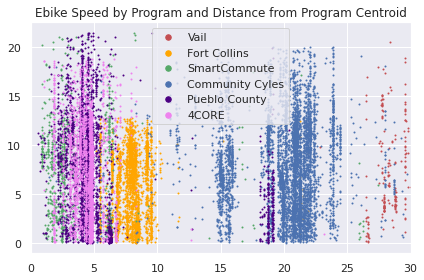

In [42]:
%matplotlib inline
# example of how to use six_progs_one_plot
for i in range(len(prog_names)):
    six_progs_one_plot('ebike', prog_keys[i], prog_names[i], colors[i], max_miles = 30)
lgnd = plt.legend()

for i in range(len(colors)):
     lgnd.legendHandles[i]._sizes = [30]
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Ebike Speeds by Program and Distance from Program Centroid')

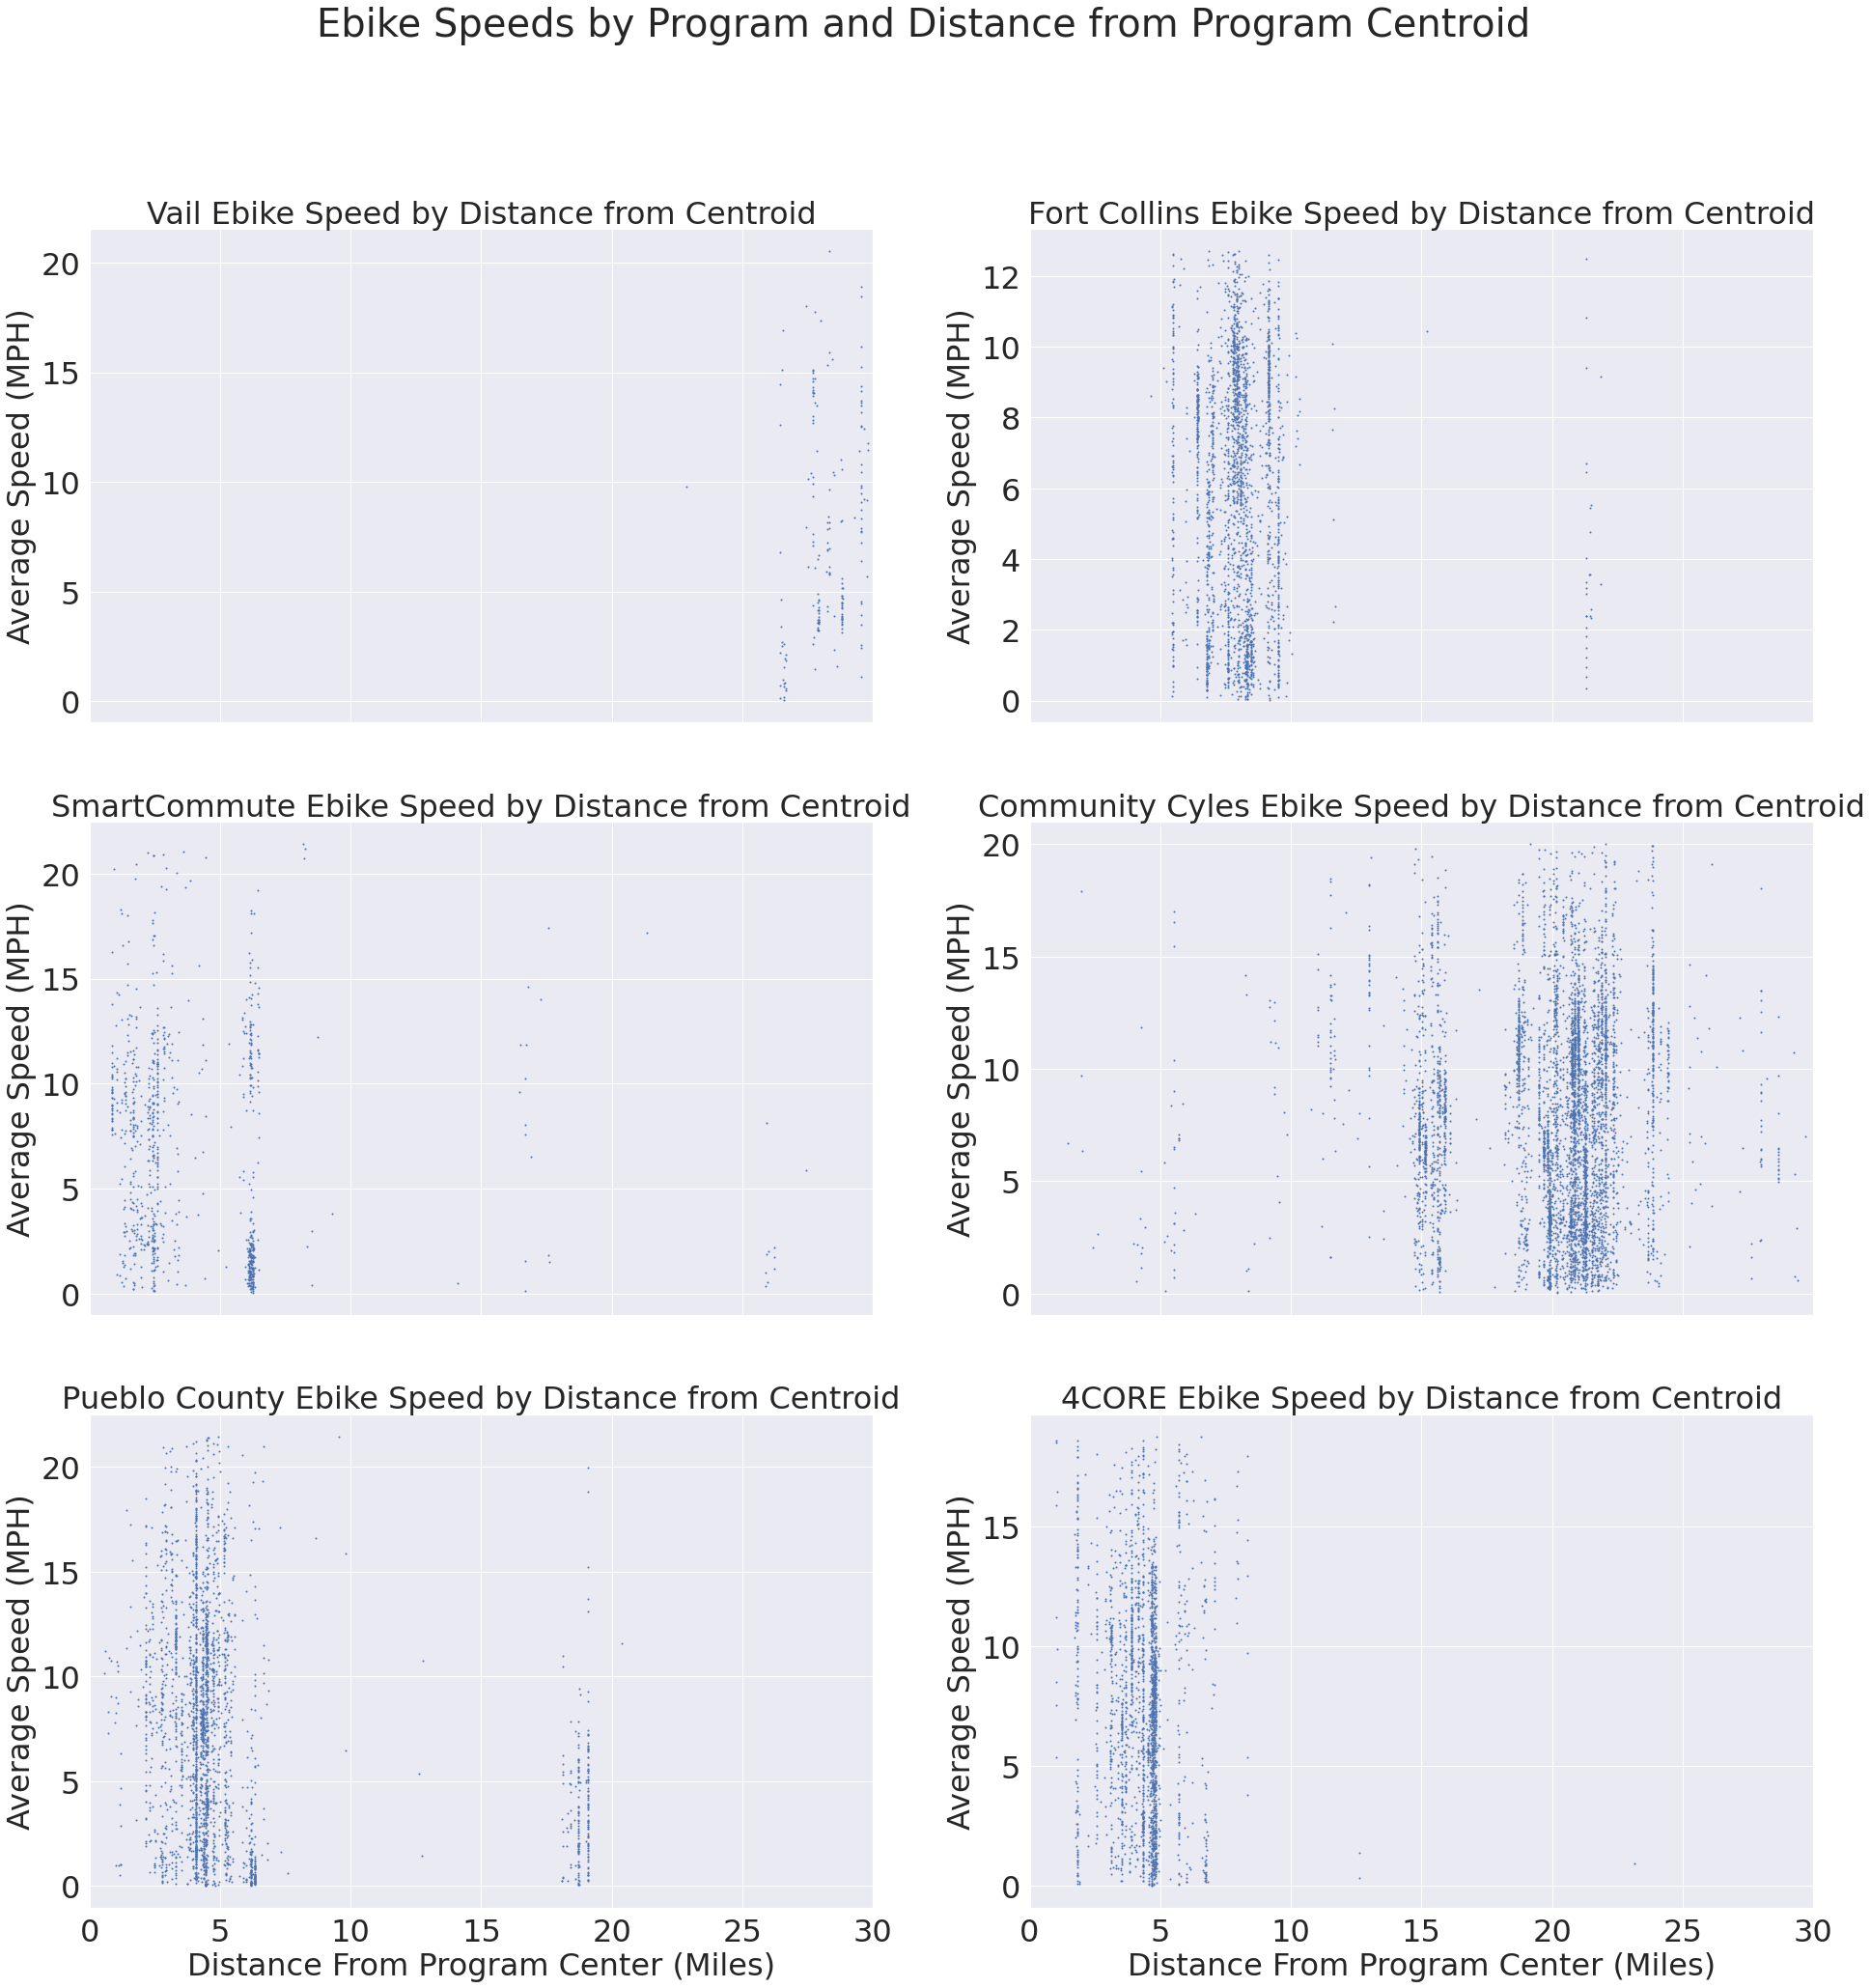

In [43]:
plt.clf()
%matplotlib inline
# example of how to use six_by_one_subplot
fig, ax = plt.subplots(3, 2, sharex = True, figsize = (32, 32))
ax = ax.ravel()
colors = ['b']*6
for i in range(len(ax)):
    six_by_one_subplot(ax, i, 'ebike', prog_keys[i], prog_names[i], colors[i], max_miles = 30)
plt.suptitle('Ebike Speeds by Program and Distance from Program Centroid', size = 40)

In [44]:
%matplotlib notebook
%matplotlib notebook

# !pip install geopandas
def visualize_mode_starts(mode):
    import pandas as pd
    from shapely.geometry import Point
    import geopandas as gpd
    from geopandas import GeoDataFrame
    mode_df = df_from_mode(mode)
    start_loc_list = mode_df['start_loc']
    start_loc_list = start_loc_list.to_numpy() # array of all start locations
    
    start_loc_list = locs_to_arrays(start_loc_list)
    
    start_loc_list = np.array([*start_loc_list])
    df = pd.DataFrame({'Lat': start_loc_list[:, 0], 'Long': start_loc_list[:, 1]})

    geometry = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
    gdf = GeoDataFrame(df, geometry=geometry)   

    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

    # this is an interactive map too:
    import plotly.express as px
    import pandas as pd

    fig = px.scatter_geo(df,lat='Lat',lon='Long')
    fig.update_layout(title = 'World map', title_x=0.5)
    fig.show()


In [45]:
# for each trip in the car df, convert its start loc to a tuple -> compare to list of other tuples
# if distance(tuple1, tuple2) <= 10 miles
# add trip to new df
# NOTE: this function is comically inefficient and still a W.I.P.
def filter_those_far_from_ebikes():
    from geopy import distance


    car_trips = df_from_mode('all_car')
    car_trips['avg_speed'] = car_trips['distance'].div(car_trips['duration']) * MPH_PER_MPS
    car_trips_filtered = []

    for row1 in car_trips.itertuples():
        tup_coords = np.flipud(list(row1.start_loc.values())[1])# todo: weird. make less hacky if there's time
        for row in ebike_latlong_df.itertuples():
            coords = [row.Lat, row. Long]
            if distance.distance(coords, tup_coords).miles < 10: # subject to change
                car_trips_filtered.append(row1.avg_speed)
                break

In [46]:
# generate a list of all ebike end locations,
# then categorize them by trip purpose
df = df_from_mode('ebike')
purpose_list = list(df.purpose_confirm)
end_loc_list = df.end_loc

end_loc_list = locs_to_arrays(end_loc_list)

end_loc_list = pd.Series(end_loc_list)
purpose_list = pd.Series(purpose_list)
ends = pd.concat([end_loc_list, purpose_list], axis =1)

ends = ends.rename(columns = {list(ends)[0]: 'latlong', list(ends)[1]: "purpose"})

ends = pd.DataFrame(ends['latlong'].to_list(), columns=['lat','long'])
ends = pd.concat([ends, purpose_list], axis = 1)
ends = ends.rename(columns = {list(ends)[0]: 'lat', list(ends)[1]: "long", 
                              list(ends)[2]: "purpose"})


In [47]:
def smart_query(df, purpose):
    # dumb hack to combine religion and school
    if purpose == 'Religion/School':
        df = df.query("Trip_purpose == 'Religious' or Trip_purpose == 'School'")
    elif purpose == 'Social/Recreation':
        df = df.query("Trip_purpose == 'Entertainment/Social' or Trip_purpose == 'Recreation/Exercise'")
    else:
        purpose_str = "Trip_purpose == '" + str(purpose) +"'"
        df = df.query(purpose_str)
    return df

In [48]:
df = expanded_ct
MEP_purposes = 'Religion/School', 'Personal/Medical', 'Shopping', 'Social/Recreation', 'Meal', 'Work'

In [49]:
MEP_percents = ['{:.1%}'.format(len(smart_query(df, i))/(len(df))) for i in MEP_purposes]

MEP_nums = [len(smart_query(df, i)) for i in MEP_purposes]
all_percents = MEP_nums/np.sum(MEP_nums)

In [50]:
# snippet of code to calculate the number of unique users by program id
program_pops = []
uniques = []
for key in keys:
    prog = df_from_program(key)
    program_pops.append(len(df_from_program(key)))
    uniques.append(len(prog['user_id'].unique()))


In [51]:
def centroid_of_latlongs(latlong_list):
    # find centroid of all points for a list
    from shapely.geometry import MultiPoint
    points = MultiPoint(latlong_list)
    centroid = points.centroid #True centroid, not necessarily an existing point
    # points.representative_point() # A represenative point, not centroid,
    
    return centroid.coords.xy[0][0], centroid.coords.xy[1][0] # return latlong as tuple of floats        

In [52]:
def start_ends_from_user(user_list):
    # given a list of users, return start locs, end locs
    all_starts = []
    all_ends = []
    for i in range(len(user_list)):
        user_trip_df = expanded_ct.query("user_id =='" + user_list[i] +"'")
        starts, ends = user_trip_df.start_loc, user_trip_df.end_loc
        starts, ends = locs_to_arrays(starts), locs_to_arrays(ends)
        avg_start, avg_end = centroid_of_latlongs(starts), centroid_of_latlongs(ends)
        
        all_starts.append(avg_start)
        all_ends.append(avg_end)
    return all_starts, all_ends

In [53]:
# example of how to use start_ends_from_user
df = expanded_ct
prog_users = df['user_id'].astype(str)
prog_users = [i.replace('-','') for i in prog_users] # remove all dashes from strings
x = np.unique(prog_users)
start, end = start_ends_from_user(x)

In [54]:
# saving starts and ends as df's
start = np.array(start)
end = np.array(end)

start = pd.DataFrame(start[:,0], start[:,1])
end = pd.DataFrame(end[:,0], end[:,1])